<a href="https://colab.research.google.com/github/Trading-com-Dados/Jornada-Quant-04/blob/main/Live_01_Obten%C3%A7%C3%A3o_e_an%C3%A1lise_de_dados_de_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Jornada Quant - 4ª Edição** 
---

### Código desenvolvido no primeiro dia da Jornada Quant (08/02/2022)<br>

[Dia 01](https://www.youtube.com/watch?v=XgbySUkNs64&t=5s) | [Dia 02](https://www.youtube.com/watch?v=lQMa-_Ng0qc&t=30s) | [Dia 03](https://www.youtube.com/watch?v=oJ1Oo8swgCU&t=88s) | [Dia 04](https://www.youtube.com/watch?v=ZkAP3MV1aFM)<p>

### *Disclaimer:*
Este código foi elaborado para fins exclusivamente educacionais. O conteúdo aqui apresentado visa fornecer informações complementares para auxiliar o investidor na tomada de suas próprias decisões de investimento. Reforçando, nenhum tópico aqui abordado constitui qualquer tipo de indicação/oferta/solicitação de compra/venda de qualquer produto.<br/>
<br/>
<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300">

---

# 1. Instalação e importação de bibliotecas

In [1]:
!pip install python-binance
!pip instal plotly

     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 288 kB 45.7 MB/s 
     |████████████████████████████████| 1.1 MB 50.0 MB/s 
     |████████████████████████████████| 103 kB 59.5 MB/s 
     |████████████████████████████████| 144 kB 58.4 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 271 kB 48.3 MB/s 
ERROR: unknown command "instal" - maybe you meant "install"


In [2]:
import pandas as pd
from binance.client import Client
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
client = Client()

In [6]:
btcbrl = client.get_historical_klines(symbol = "BTCBRL", start_str = "2021-01-01", end_str = "2022-02-08", interval = Client.KLINE_INTERVAL_1DAY)

In [7]:
type(btcbrl)

list

In [10]:
btc_brl = pd.DataFrame(btcbrl)

In [11]:
btc_brl.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1609459200000,152056.00000000,154167.00000000,150911.00000000,153480.00000000,58.94861700,1609545599999,9013538.82790500,6193,31.66333800,4844372.87657400,0
1,1609545600000,153478.00000000,173900.00000000,152171.00000000,168784.00000000,187.81836700,1609631999999,31072559.50919900,17243,94.22368100,15547826.49058000,0
2,1609632000000,168885.00000000,180925.00000000,167897.00000000,173503.00000000,172.84791800,1609718399999,30309745.06470000,19212,88.11589700,15459361.59199600,0
3,1609718400000,173504.00000000,175981.00000000,150000.00000000,169820.00000000,245.30932800,1609804799999,40581533.73573100,24657,122.68715300,20310319.81296200,0
4,1609804800000,169825.00000000,182966.00000000,159769.00000000,179972.00000000,229.90616900,1609891199999,39920823.60510600,23843,116.75442100,20261180.25133100,0


In [12]:
# Renomear as colunas
btc_brl.rename(columns={0:'date',1:'open',2:'high',3:'low',4:'close'},inplace=True)

# Configurar o indice do dataframe como sendo a data
btc_brl.set_index('date', inplace=True)

# Mudar o formato da data para padrão
btc_brl.index = pd.to_datetime(btc_brl.index,unit='ms')

# Dropar todas as colunas da 4 pra frente
btc_brl = btc_brl.drop(btc_brl.columns[4:],axis=1)

In [13]:
btc_brl.head()

,open,high,low,close
date,,,,
2021-01-01,152056.00000000,154167.00000000,150911.00000000,153480.00000000
2021-01-02,153478.00000000,173900.00000000,152171.00000000,168784.00000000
2021-01-03,168885.00000000,180925.00000000,167897.00000000,173503.00000000
2021-01-04,173504.00000000,175981.00000000,150000.00000000,169820.00000000
2021-01-05,169825.00000000,182966.00000000,159769.00000000,179972.00000000


In [14]:
btc_brl.dtypes

open     object
high     object
low      object
close    object
dtype: object

In [15]:
btc_brl['open'] = pd.to_numeric(btc_brl['open'])
btc_brl['high'] = pd.to_numeric(btc_brl['high'])
btc_brl['low'] = pd.to_numeric(btc_brl['low'])
btc_brl['close'] = pd.to_numeric(btc_brl['close'])

# 2. Análise Quantitativa

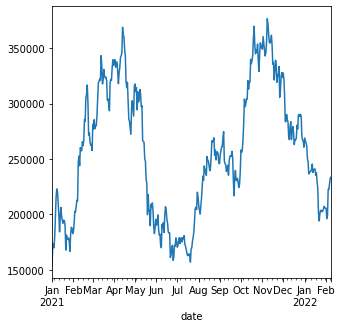

In [18]:
btc_brl['close'].plot(figsize = (5,5));

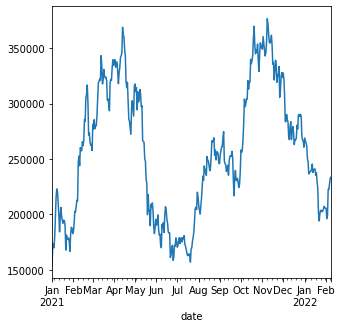

In [19]:
btc_brl.close.plot(figsize = (5,5));

In [20]:
btc_brl['retornos'] = btc_brl['close'].pct_change()

In [21]:
btc_brl.head()

,open,high,low,close,retornos
date,,,,,
2021-01-01,152056.0,154167.0,150911.0,153480.0,NaN
2021-01-02,153478.0,173900.0,152171.0,168784.0,0.099713
2021-01-03,168885.0,180925.0,167897.0,173503.0,0.027959
2021-01-04,173504.0,175981.0,150000.0,169820.0,-0.021227
2021-01-05,169825.0,182966.0,159769.0,179972.0,0.059781


In [22]:
btc_brl['retornos'].describe()

count    403.000000
mean       0.001815
std        0.039452
min       -0.124411
25%       -0.019981
50%        0.000319
75%        0.021763
max        0.165940
Name: retornos, dtype: float64

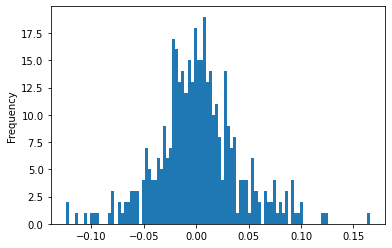

In [25]:
# Distribuição dos retornos do BTC

btc_brl['retornos'].plot.hist(bins = 100);

In [26]:
# Janela de volatilidade

vol_30 = btc_brl['retornos'].rolling(window = 30).std()

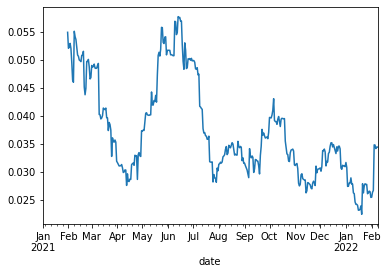

In [27]:
vol_30.plot()

In [28]:
# Drawdown em janela de 30 dias
# Perda máxima em um determinado período - distância entre ganho máximo e a mínima

dd_30 = btc_brl['retornos'].rolling(window = 30).min()

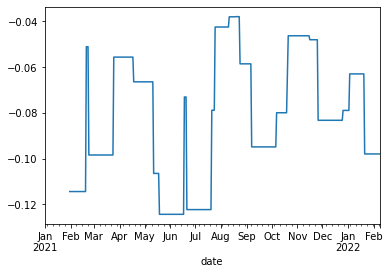

In [29]:
dd_30.plot();

# 3. Criação dos sinais do trading e backtesting

## 3.1. Definição 

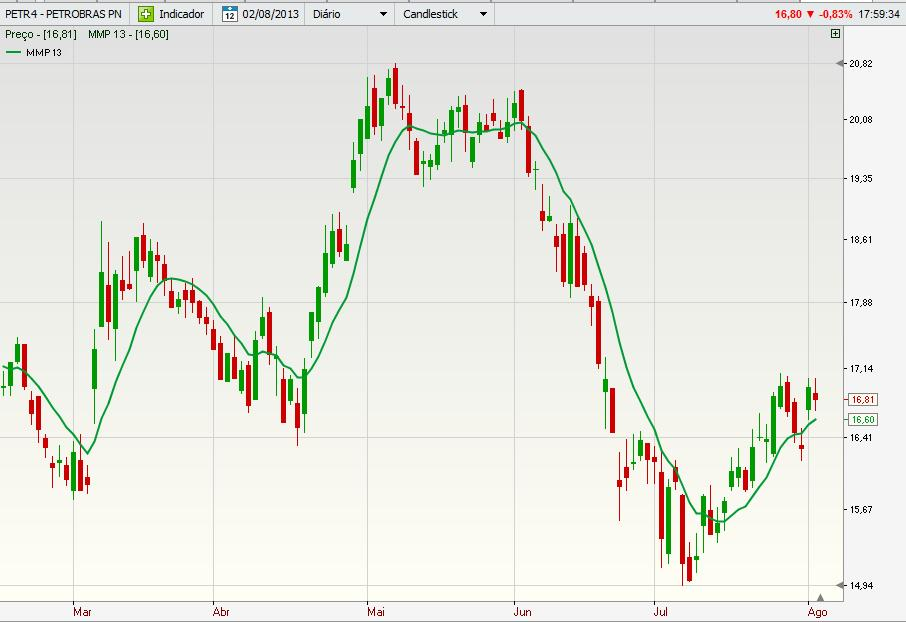

In [30]:
import IPython
url = 'https://i1.wp.com/escolatrader.net/wp-content/uploads/2013/08/petr4pond.jpg'
IPython.display.Image(url, width = 500)


In [31]:
# Lembrete: procure parametrizar tudo o que você faz

## Variação mínima do preço || Ações = R$0.01 || WINFUT = 5pts || INDFUT= 1pt

tick_min = 1 # variação minínima para ações no preço
MM_periodo = 9


## 3.2. Construção do sinal de COMPRA

Regra 1: Preço Fech > MM

In [33]:
## Cálculo Média Móvel de 9 períodos
MMA = btc_brl['close'].rolling(window=MM_periodo).mean()

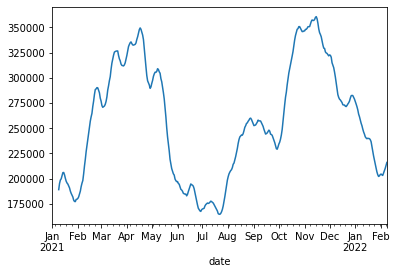

In [34]:
MMA.plot();

In [35]:
btc_brl['MMA'] = MMA
btc_brl.head(20)

,open,high,low,close,retornos,MMA
date,,,,,,
2021-01-01,152056.0,154167.0,150911.0,153480.0,NaN,NaN
2021-01-02,153478.0,173900.0,152171.0,168784.0,0.099713,NaN
2021-01-03,168885.0,180925.0,167897.0,173503.0,0.027959,NaN
2021-01-04,173504.0,175981.0,150000.0,169820.0,-0.021227,NaN
2021-01-05,169825.0,182966.0,159769.0,179972.0,0.059781,NaN
2021-01-06,179990.0,197555.0,177210.0,196635.0,0.092587,NaN
2021-01-07,196752.0,222813.0,194600.0,215874.0,0.097841,NaN
2021-01-08,216160.0,228045.0,200150.0,222915.0,0.032616,NaN
2021-01-09,223113.0,225333.0,213593.0,220612.0,-0.010331,189066.111111


In [37]:
#GRÁFICO MÉDIA MOVEL
#cria figura
fig = make_subplots(rows=1, cols=1)
#Adiciona o gráfico de candlestick com os parametros OHLC no eixo y e no eixo x o index com as datas
fig.add_trace(go.Candlestick(name='Bitcoin_BRL', x=btc_brl.index, open=btc_brl['open'], high = btc_brl['high'], low=btc_brl['low'], close=btc_brl['close'],showlegend=True), row=1,col=1)
# cria o gráfico de MMA com o mesmo racional de eixo de cima
fig.add_trace(go.Scatter(name='MMA_9p', x=btc_brl.index, y=btc_brl.MMA, marker_color='blue'),row=1,col=1)
#Personalizar o eixo Y
fig.update_yaxes(title_text="<b> Preço Bitcoin (R$)", row=1, col=1)
#Personalizar aspectos da figura em geral
fig.update_layout(xaxis_rangeslider_visible=False,width=1000 ,height=500)
#Mostra a figura
fig.show()

Regra 2: Preço candle anterior < MMA9p